Import modules

In [802]:
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
import datetime as dt
from datetime import date
import mplfinance as mpf
import scipy.optimize as sci_plt
import math

from pprint import pprint
from fake_useragent import UserAgent
from sklearn.preprocessing import StandardScaler

Set tickers & Dates

In [803]:
tickers = [
    # Technology
    "NVDA", "META",
    
    # Finance
    "JPM", "BAC",
    
    # Healthcare
    "JNJ", "PFE",
    
    # Energy
    "XOM", "CVX",
    
    # Consumer Discretionary
    "AMZN", "NKE"
]
start_date = dt.datetime(2023, 7, 21)
#end_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime.today().date()

### Load the data 


In [804]:
stock_data = yf.download(tickers, start_date, end_date, multi_level_index=False, auto_adjust= False)
stock_closing_prices = stock_data['Adj Close']

[*********************100%***********************]  10 of 10 completed


### Visualise the stock data over time 

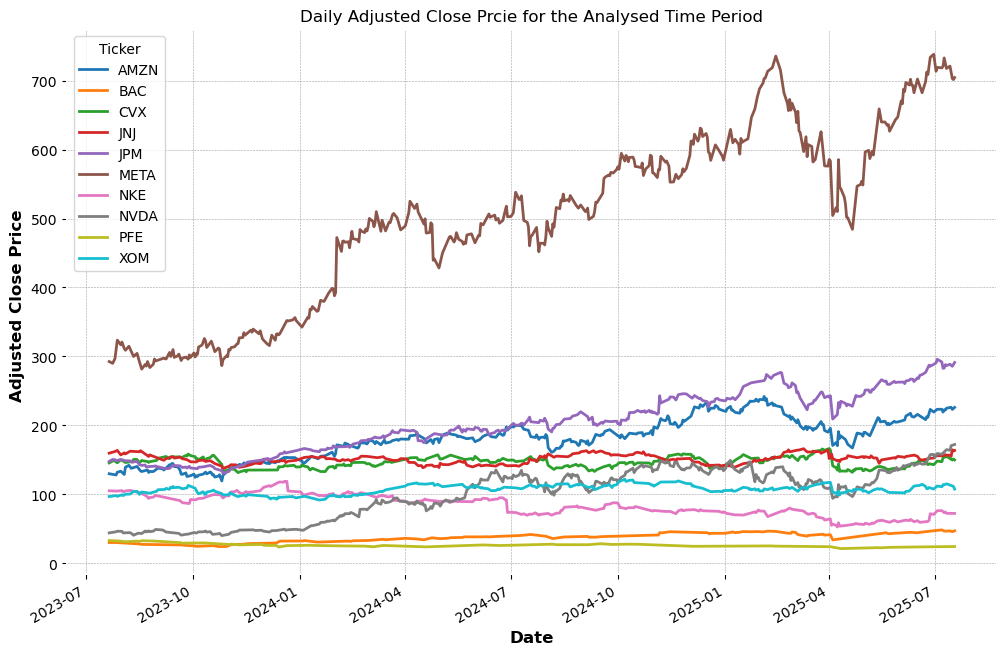

<Figure size 640x480 with 0 Axes>

In [805]:
stock_closing_prices = stock_data['Adj Close']

stock_closing_prices.plot(figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ')
plt.title('Daily Adjusted Close Prcie for the Analysed Time Period')
plt.show()
plt.clf()

Candlestick & Volume

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


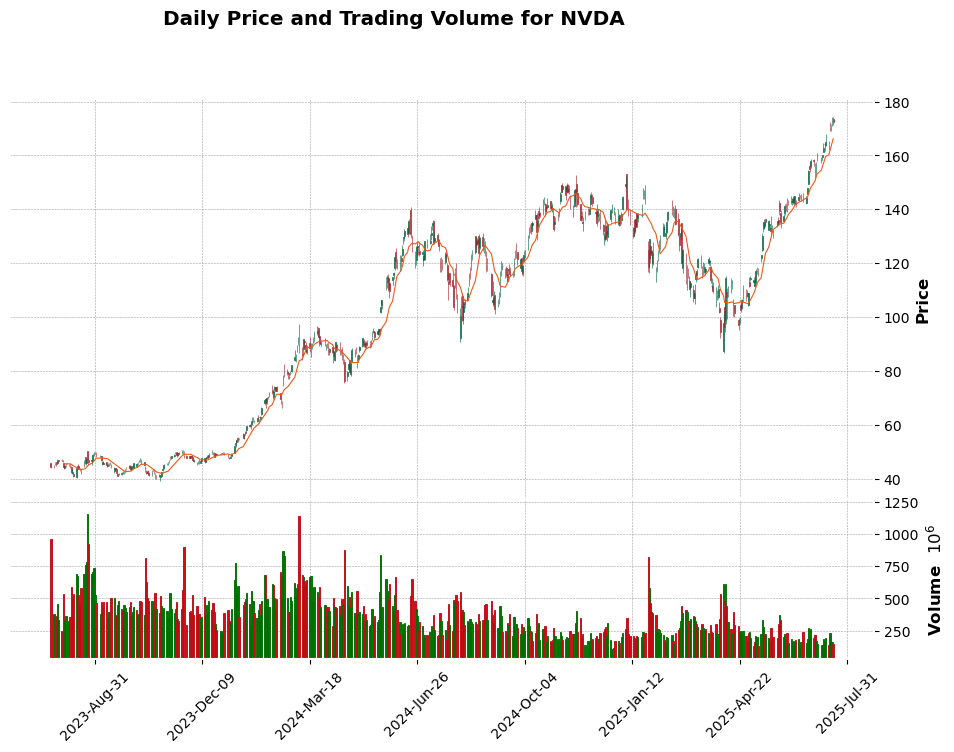

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


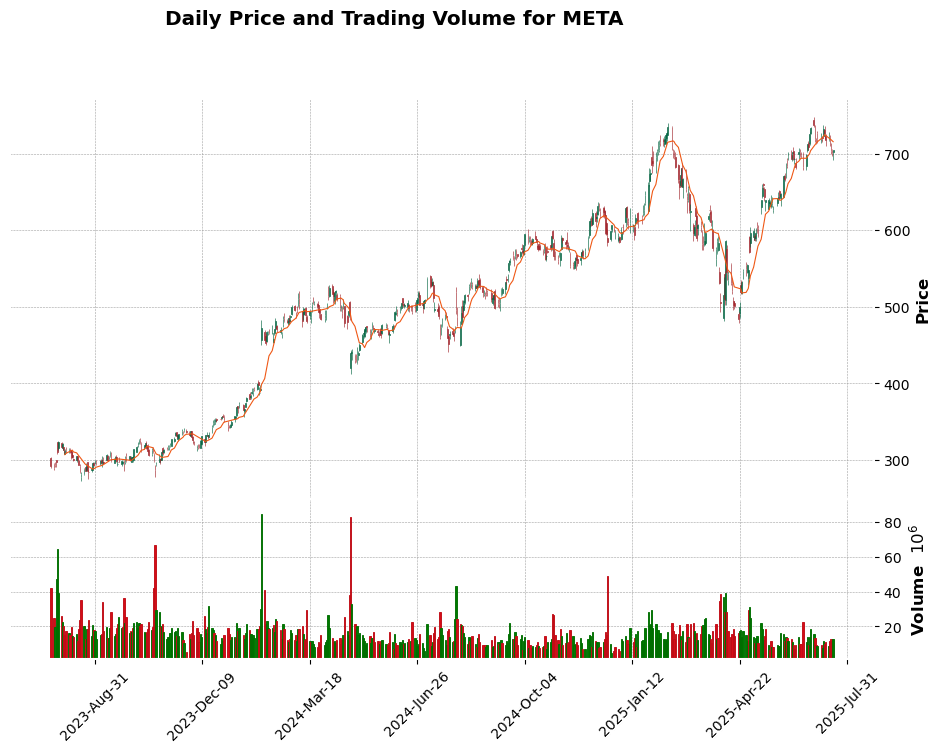

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


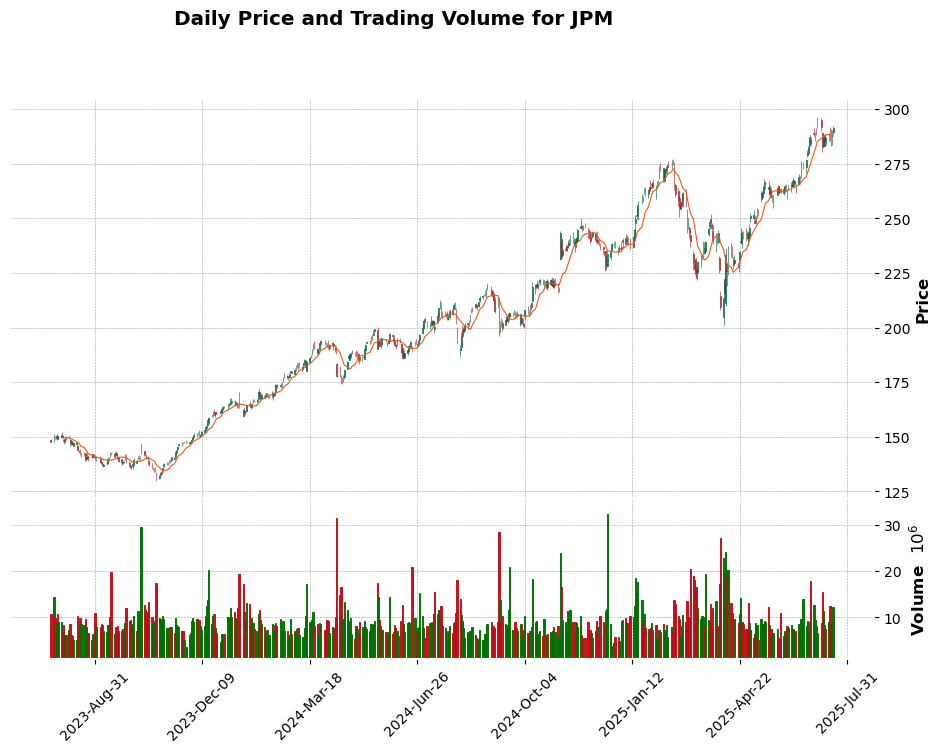

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


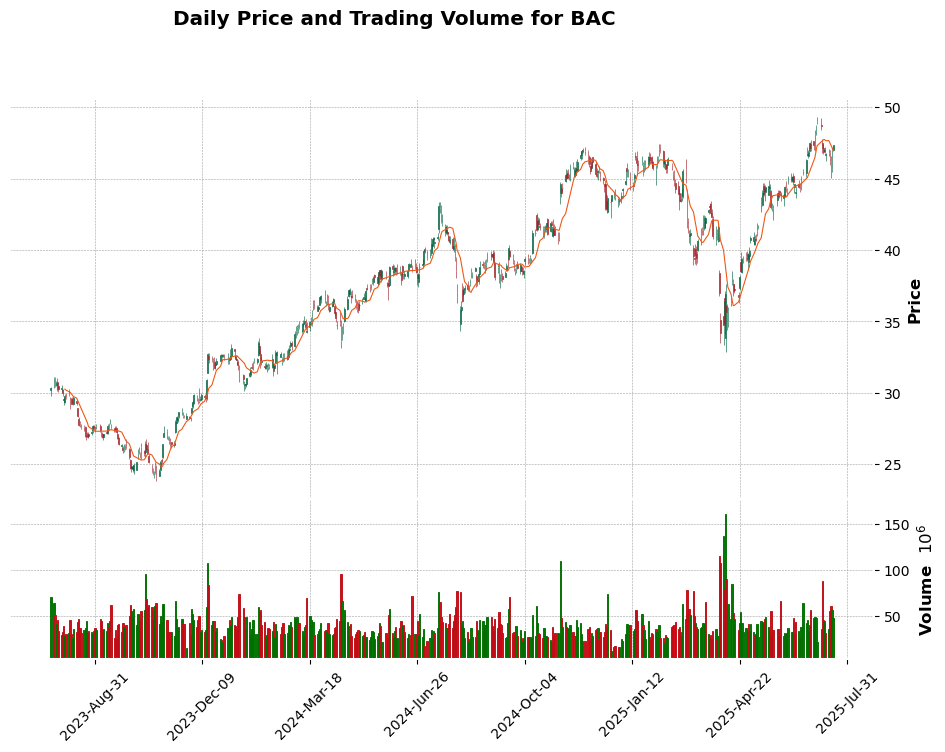

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


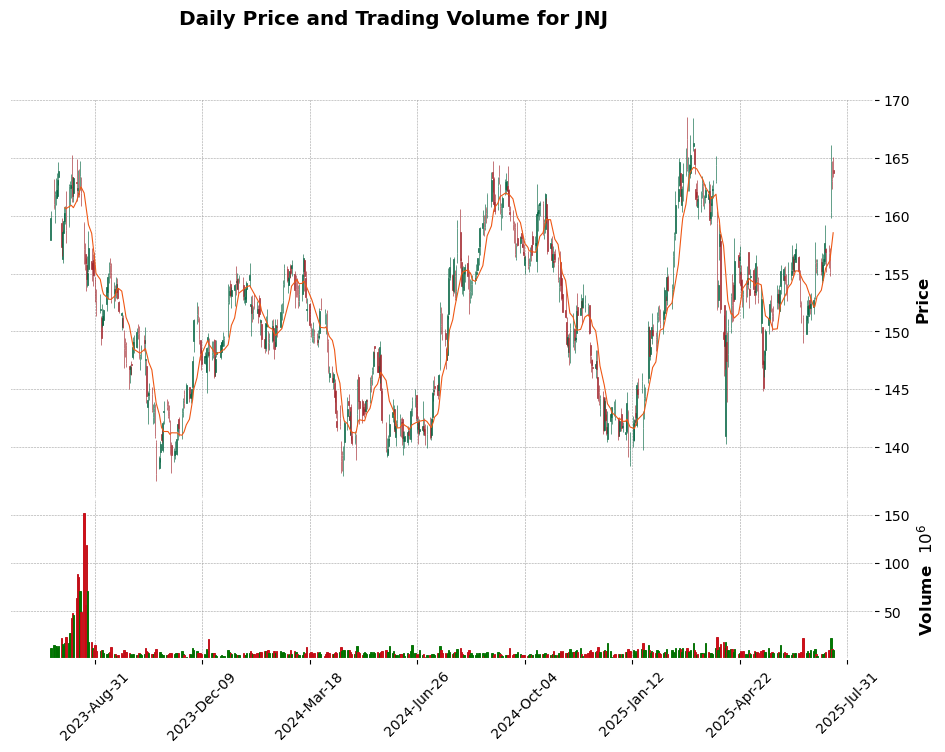

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


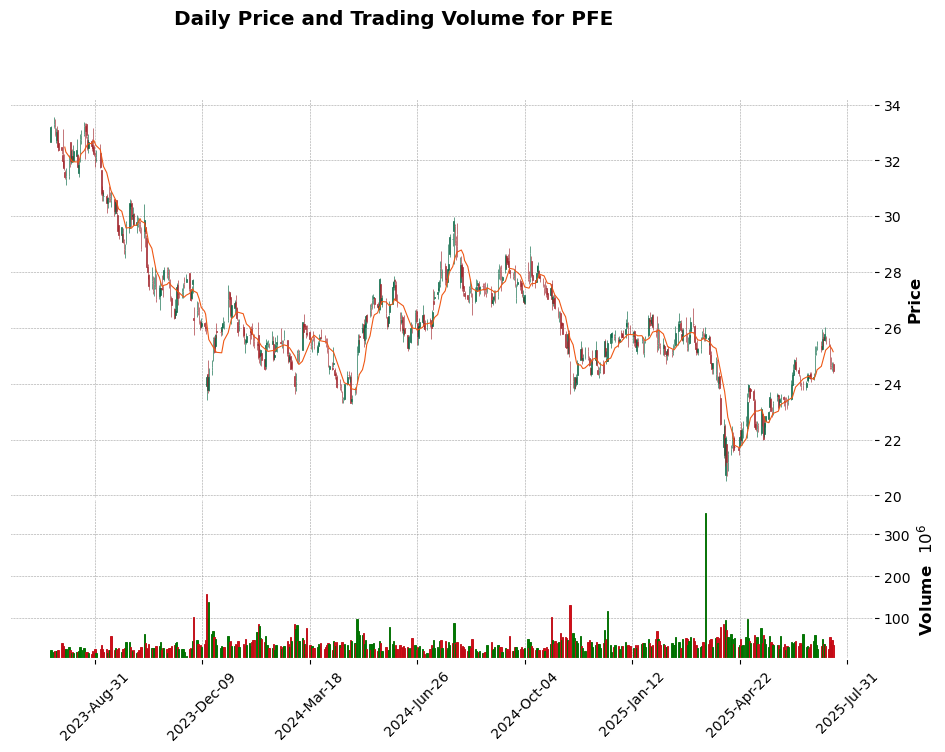

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


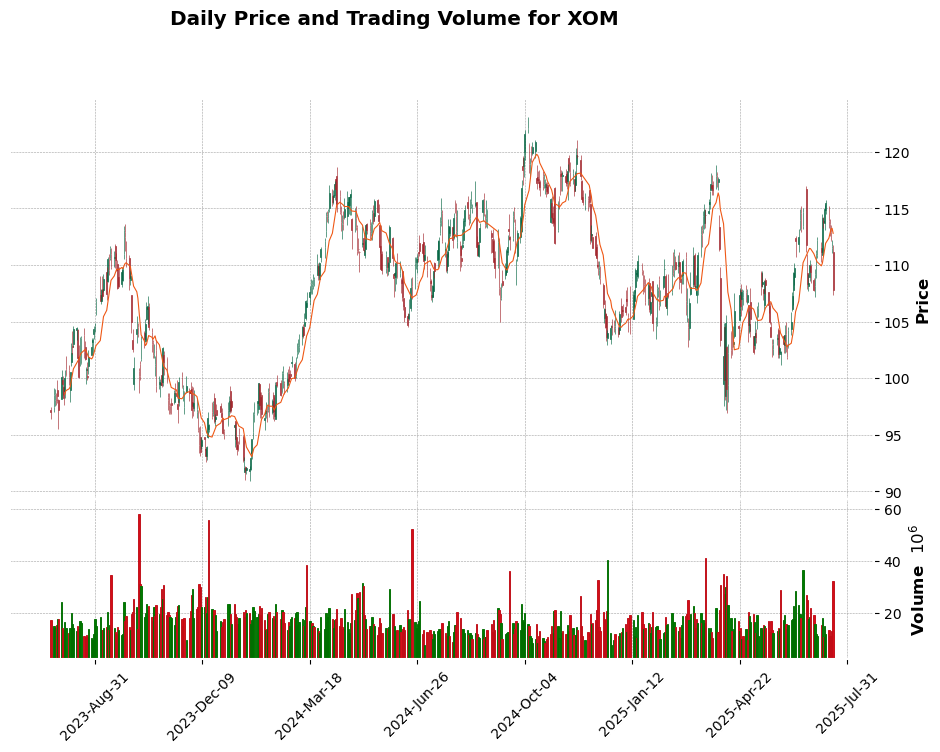

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


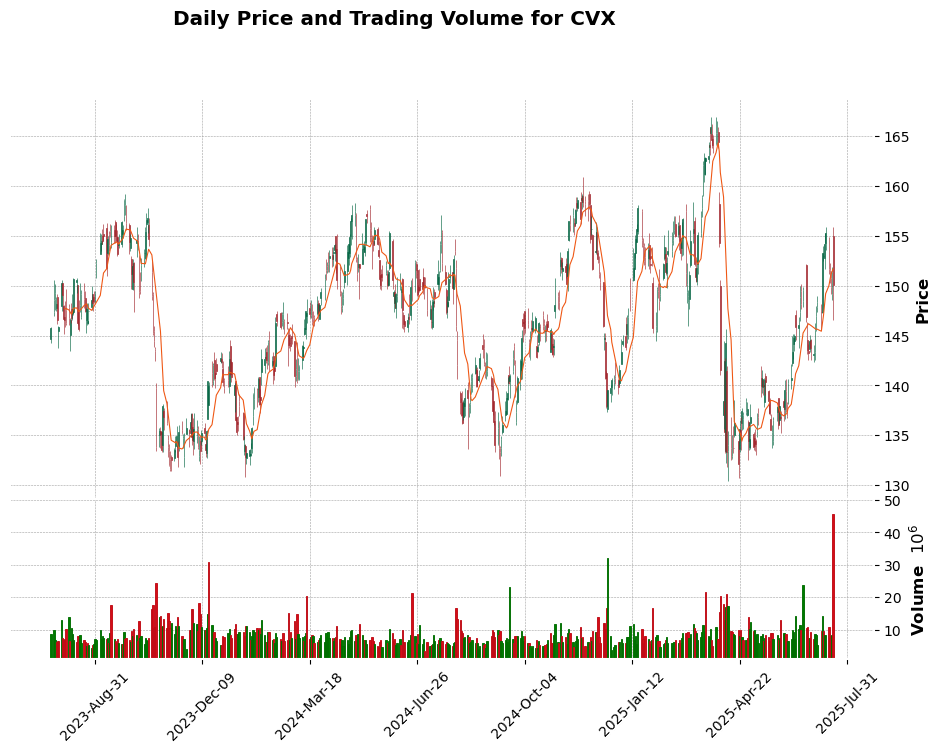

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


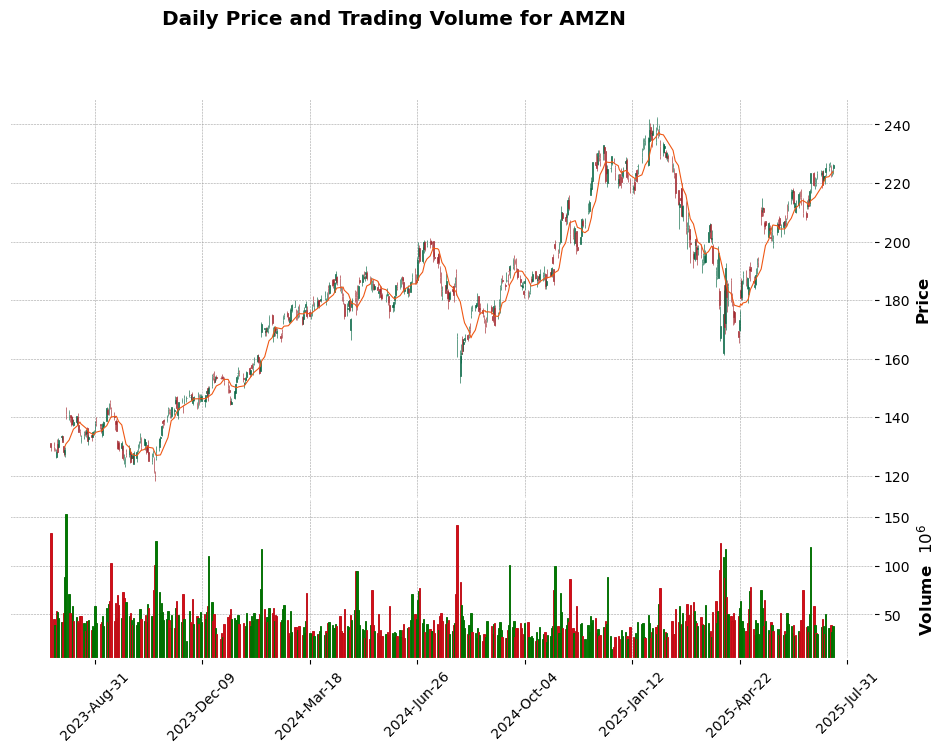

C:\Users\locka\AppData\Local\Temp\ipykernel_44160\4085317113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tick, start_date, end_date, multi_level_index= False)
[*********************100%***********************]  1 of 1 completed


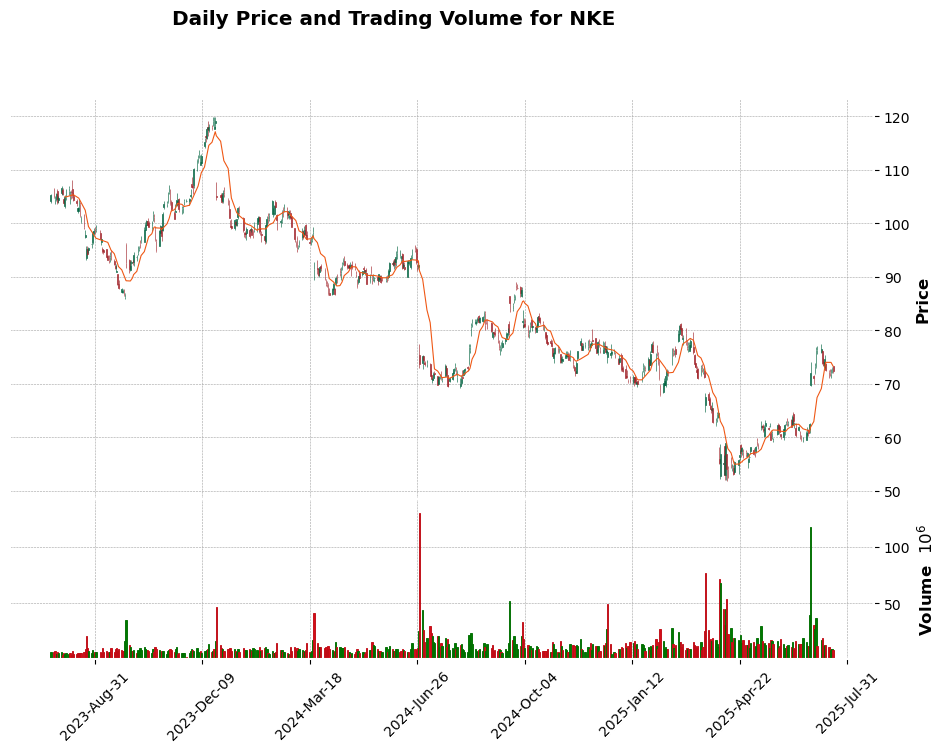

In [806]:
for tick in tickers:
        data = yf.download(tick, start_date, end_date, multi_level_index= False)
        mpf.plot(data, type = 'candle', mav = 10, style = 'charles', volume = True, show_nontrading = True, tight_layout = False, figsize= (12,8), title = f'Daily Price and Trading Volume for {tick}')

### Calculate and Visualise the daily simple rate of return

AMZN    0.001109
BAC     0.000893
CVX     0.000059
JNJ     0.000048
JPM     0.001359
META    0.001760
NKE    -0.000748
NVDA    0.002724
PFE    -0.000611
XOM     0.000212
dtype: float64


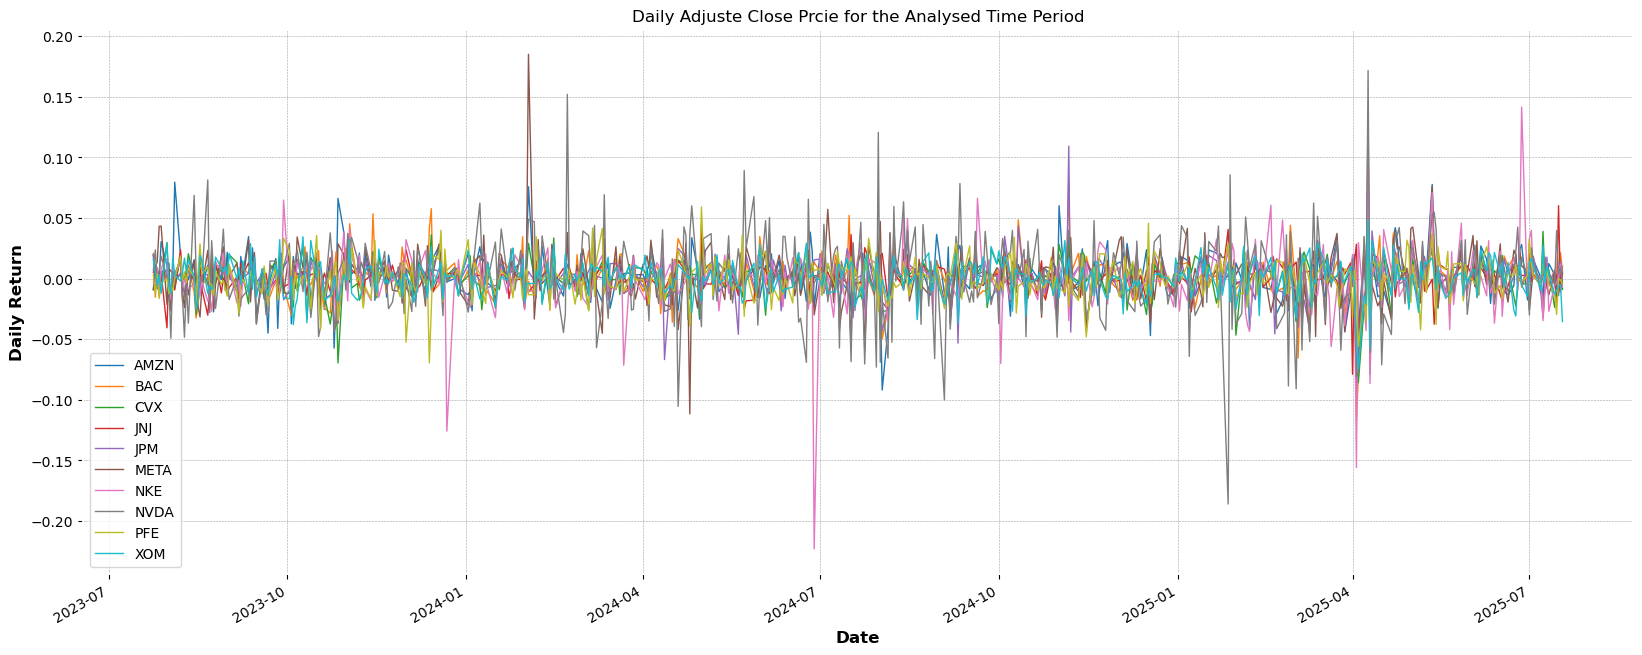

In [807]:
daily_return = pd.DataFrame()
for column in stock_closing_prices.columns:
    daily_return[column] = np.log(stock_closing_prices[column]/stock_closing_prices[column].shift(1))
daily_return = daily_return.dropna()
print(daily_return.mean())
daily_return.plot(linewidth = 1, figsize= (20,8))
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Adjuste Close Prcie for the Analysed Time Period')
plt.show()



### Create subplots of daily simple rate of return over time.

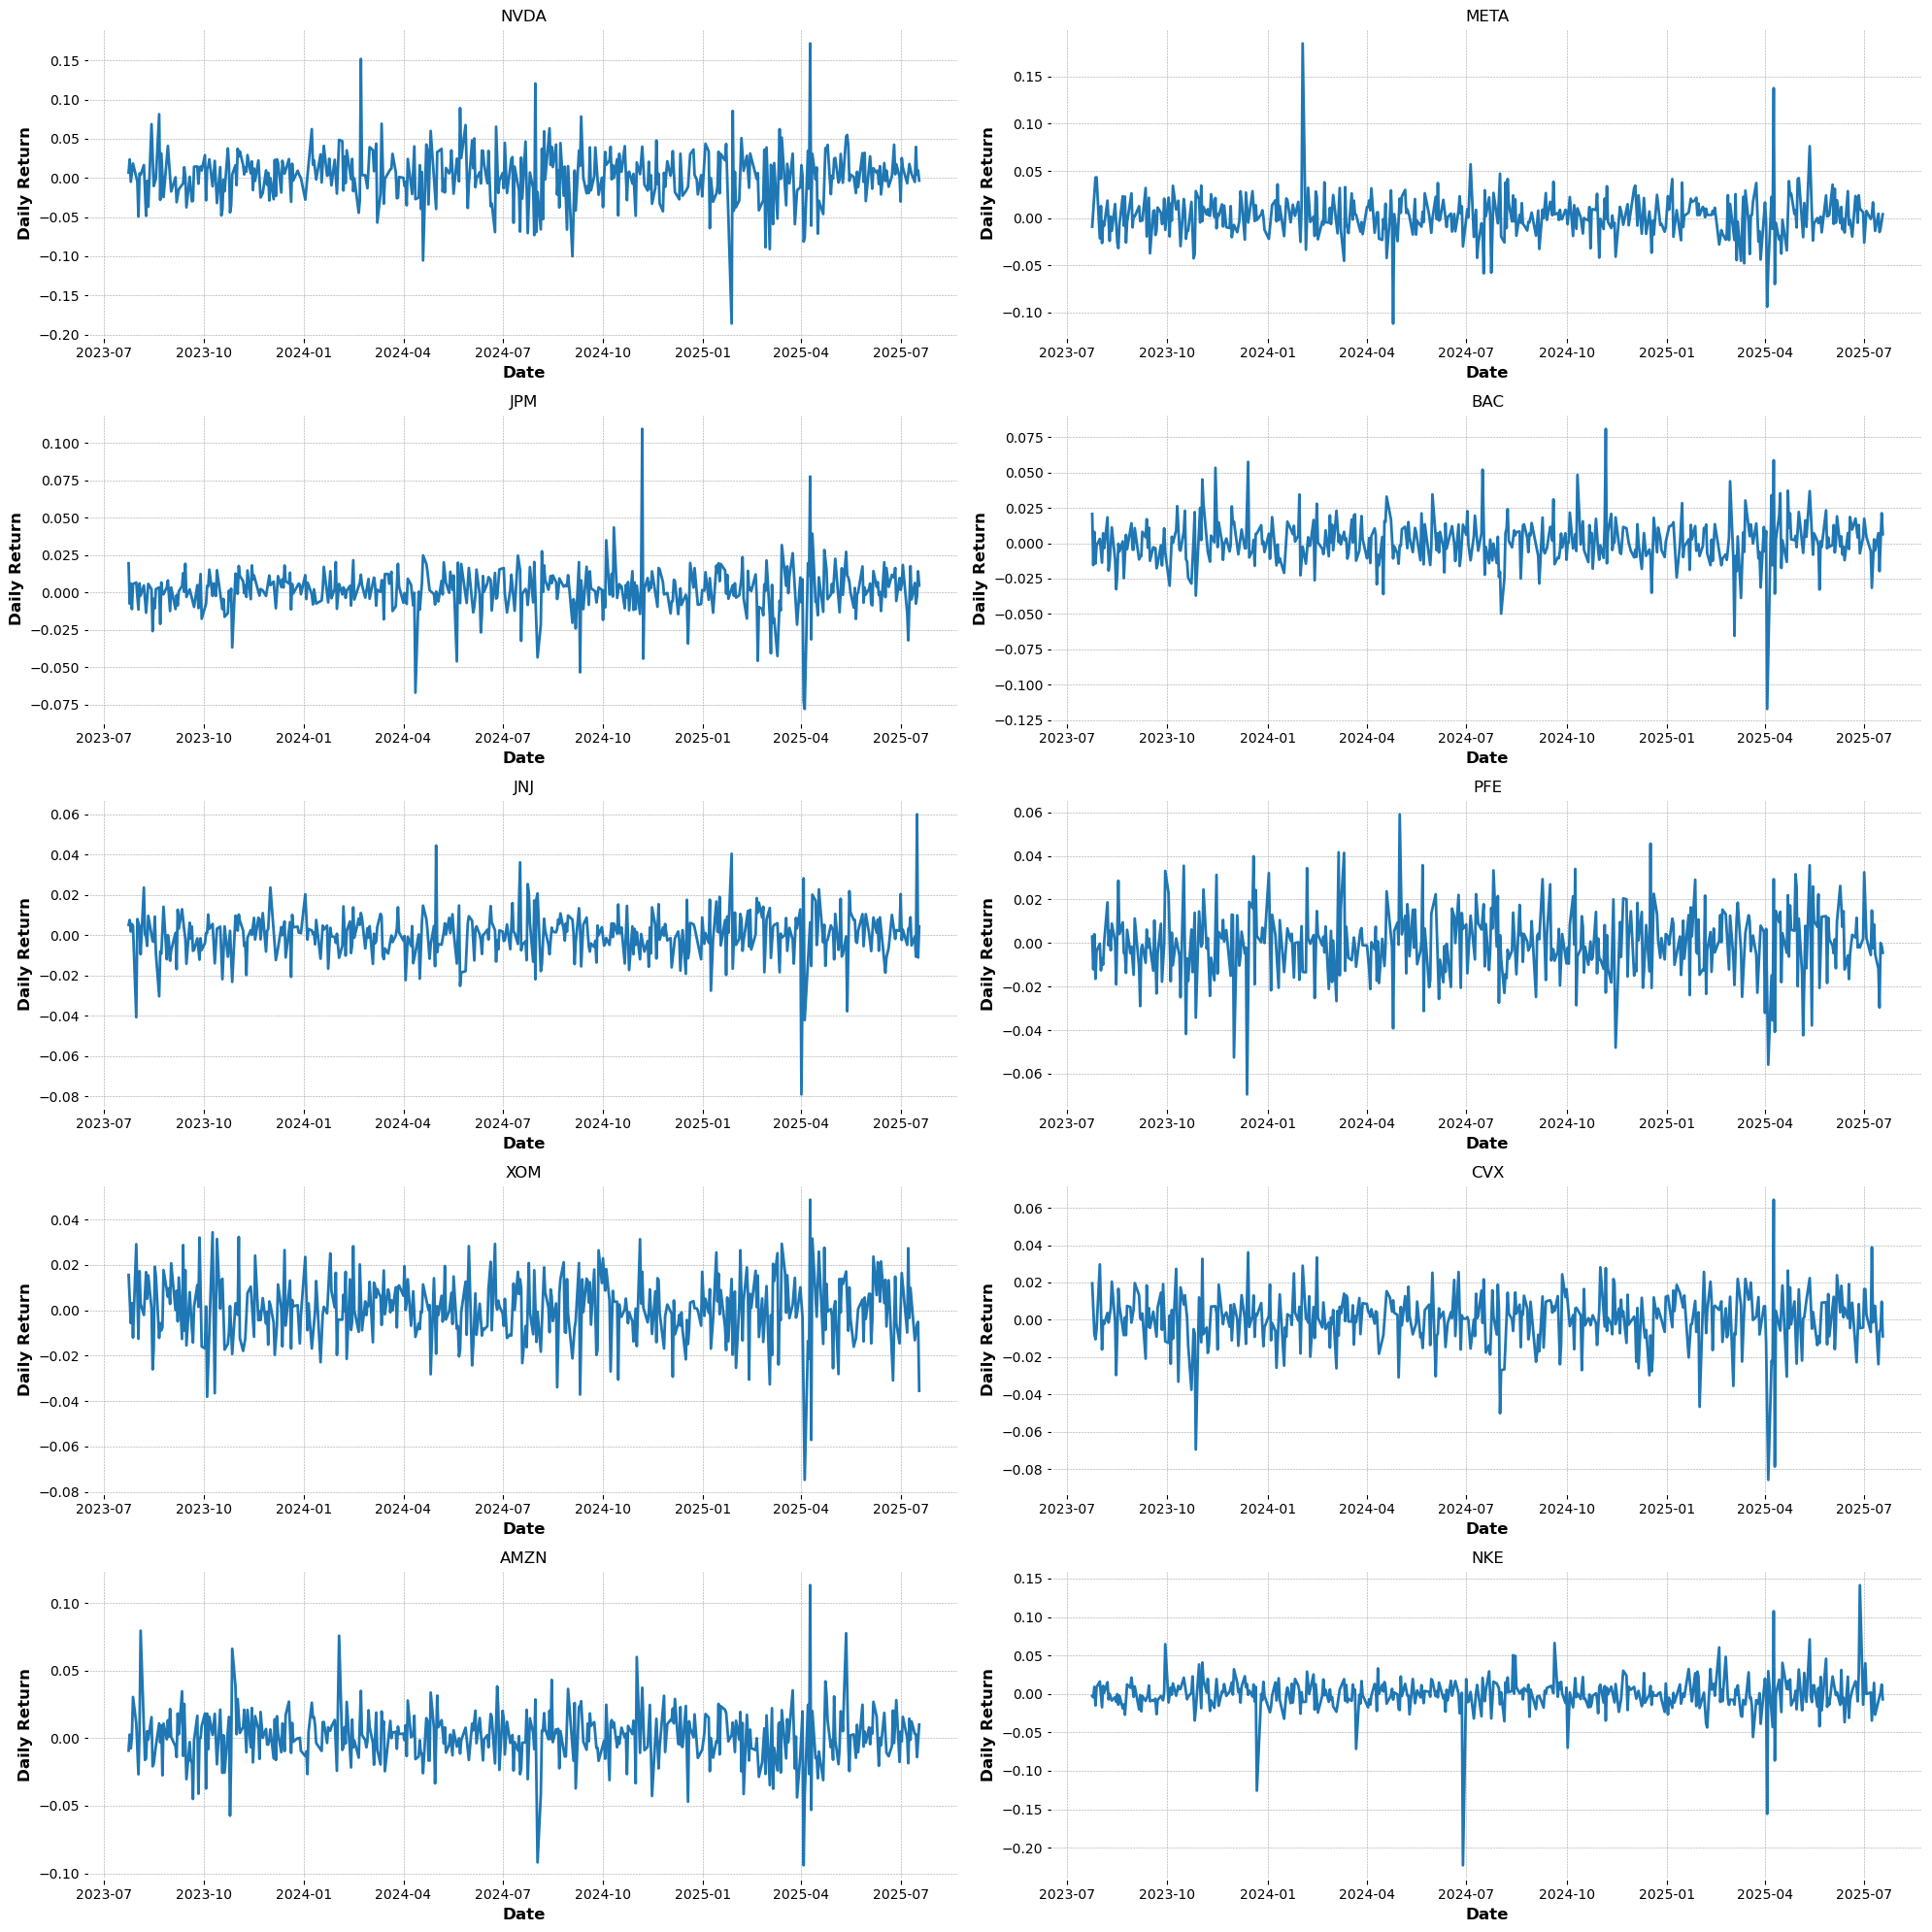

In [808]:
plot_size = len(tickers)/2
plot_size = int(math.ceil(plot_size))
fig, axes = plt.subplots(plot_size, 2, figsize = (20,20))
axes = axes.flatten()

for i , tick in enumerate(tickers):
    axes[i].plot(daily_return[tick])
    axes[i].set_title(tick)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Daily Return')
if len(tickers)<len(axes):
    fig.delaxes(axes[len(tickers)])

fig.tight_layout()
plt.show()

### Compute the daily mean rate of return

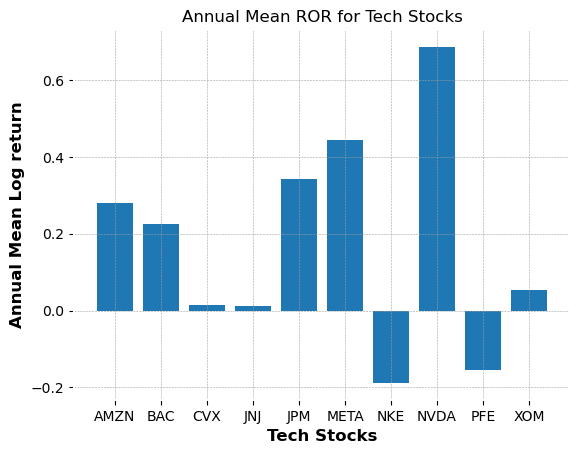

In [809]:
annual_mean = daily_return.mean()*252
plt.bar(annual_mean.index, annual_mean.values)
plt.xlabel("Tech Stocks")
plt.ylabel("Annual Mean Log return")
plt.title("Annual Mean ROR for Tech Stocks")
plt.show()

The daily mean log return shows the average performance of each stock.
NVDA outperforms others with the highest average return, while AAPL and AMD offer more modest gains.

### Compute and Compare daily Variance

### Compute and compare Standard deviation

Text(0.5, 1.0, 'Daily Standard Deviation')

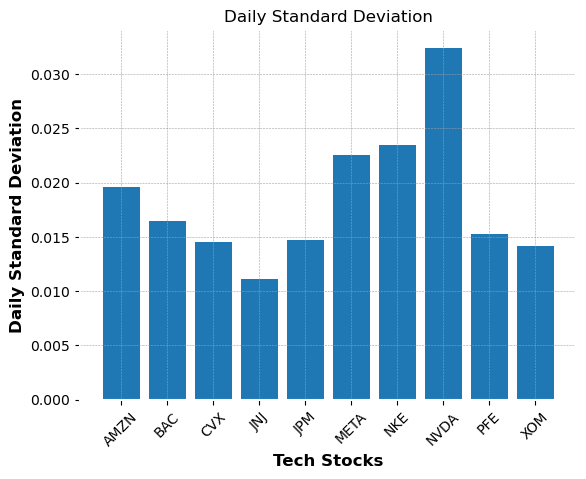

In [810]:
daily_std = daily_return.std()
daily_std
plt.bar(daily_std.index, daily_std.values)
plt.xlabel("Tech Stocks")
plt.xticks(rotation = 45)
plt.ylabel("Daily Standard Deviation")
plt.title("Daily Standard Deviation")

The standard deviation indicates a stocks risk. Among the selected tech stocks, TSLA is the most volatile, followed by NVDA, meaning they experience larger swings in daily returns. In contrast, MSFT and AAPL are the least volatile, suggesting more stable performance over time.

Interestingly, NVDA, despite its higher volatility, also has the highest mean return, which may appeal to investors with a higher risk tolerance seeking growth. Conversely, AAPL, with both the lowest volatility and return, may suit investors who prefer capital preservation over aggressive gains.

Tsla on the other hand offers high risk for very little upside potential

### Calculate and visualise the correlation between the companies.

Text(0.5, 1.0, 'Correlation Matrix Between All the stocks in the index')

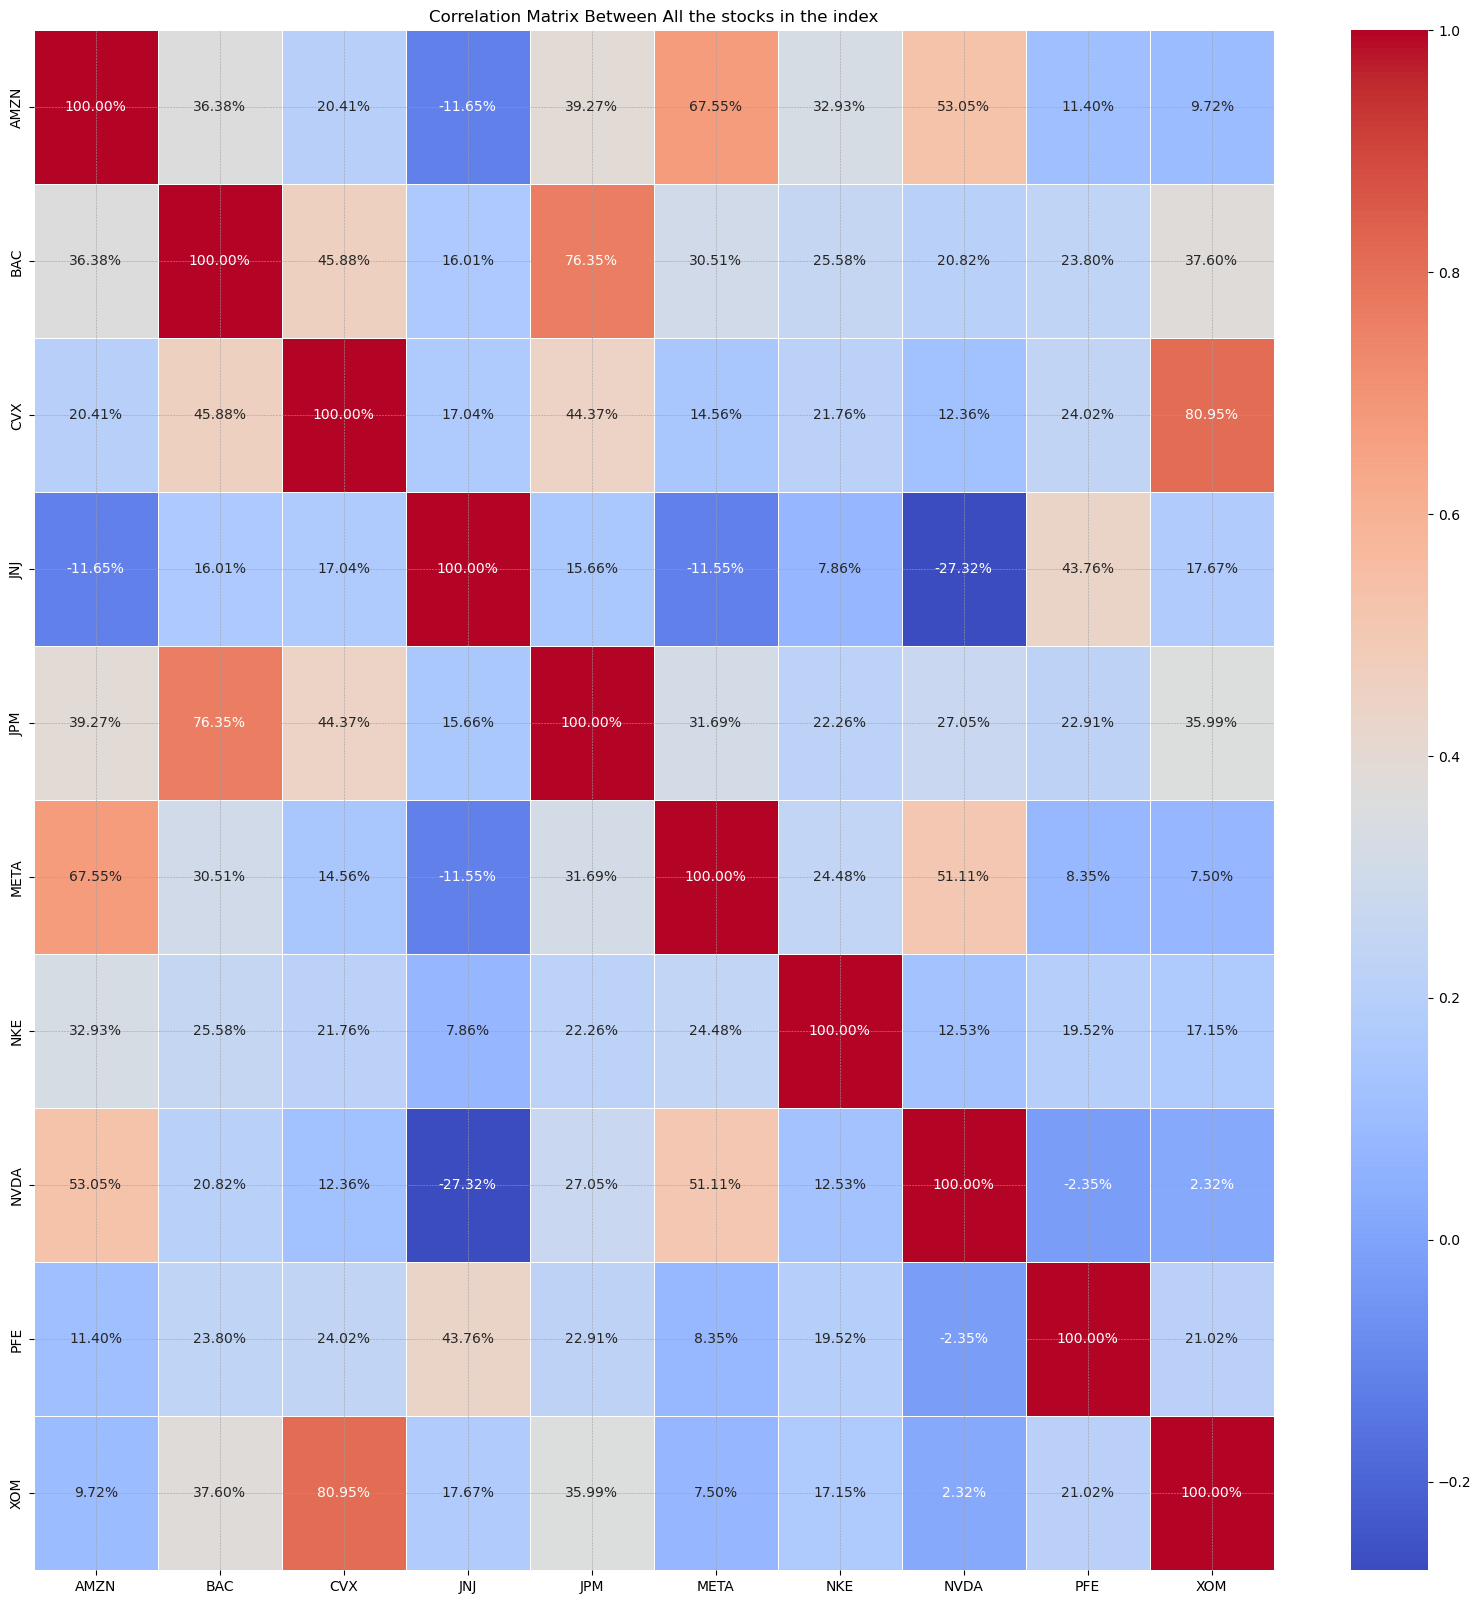

In [811]:
corr_matrix = daily_return.corr()
corr_matrix
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix, annot = True, fmt ='.2%', cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix Between All the stocks in the index')


### Efficiency Frontier Plotting


The Sharpe Ratio, is used as a measure for calculating risk-adjusted return and has been the industry standard for such calculations. The Sharpe Ratio allows us to quantify the relationship the average return earned in excess of the risk-free rate per unit of volatility or total risk."

In [812]:
#Define the number of times we want to run the simulation
num_of_portfolios = 10000
num_securities = len(tickers)

#Calculate Log return 
log_return = np.log(1 + stock_closing_prices.pct_change())
log_return.dropna(inplace= True)

#Risk Free rate
from fredapi import Fred
fred = Fred(api_key = '58d5fc9d57b922a18576edf7c5210972')
ten_year_treasury_rate = fred.get_series_latest_release('GS10') / 100
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(risk_free_rate)

#Prep the Weight Array of Numpy Zeros, This is a list of lists 
all_weights = np.zeros((num_of_portfolios, num_securities))

#Prep the Returns Array of Numpy Zeros
return_arr= np.zeros(num_of_portfolios)

#Prep the Volatility Array of Numpy Zeros
vol_arr= np.zeros(num_of_portfolios)

#Prep the Sharpe Array of Numpy Zeros
sharpe_ratio_arr= np.zeros(num_of_portfolios)

#Start the simulation
for i in range(num_of_portfolios):

    #First Calculate the weights
    weights = np.array(np.random.random(num_securities))

    #Generate the rebalanced weight. So they equal 1
    weights = weights / sum(weights)
    
    #Assign to weight Array
    all_weights[i, :] = weights

    #Calculate the Expected return for entire portfolio for the whole year and assign to array
    return_arr[i] = np.sum((log_return.mean() * weights))* 252

    #Calculate the expected volatility (risk or SD)
    vol_arr[i] = np.sqrt(
        np.dot(
            weights.T, 
               np.dot(log_return.cov() *252, weights)
               )
    )

    #Compute the sharpe and assign 
    sharpe_ratio_arr[i] = (return_arr[i] - risk_free_rate) / vol_arr[i]

#Combine All the data together
simulations_data = [return_arr, vol_arr, sharpe_ratio_arr, all_weights]

#Create the Dataframe
simulations_df = pd.DataFrame(data = simulations_data).T
#Add column Title
simulations_df.columns = ['Returns', 'Volatility', 'Sharpe Ratio', 'Weights']

#Make sure the data types are correct 
simulations_df = simulations_df.infer_objects()
print('')
print('='*80)
print('Simulation data:')
print('='*80)
print(simulations_df.head())
print('-'*80)

#Get minimum Volatility
min_vol_idx = simulations_df['Volatility'].idxmin()
min_vol_x = simulations_df.loc[min_vol_idx, 'Volatility']
min_vol_y = simulations_df.loc[min_vol_idx, 'Returns']

#Get the max sharpe
max_sharpe_idx = simulations_df['Sharpe Ratio'].idxmax()
max_sharpe_x = simulations_df.loc[max_sharpe_idx, 'Volatility']
max_sharpe_y = simulations_df.loc[max_sharpe_idx, 'Returns']

0.0438

Simulation data:
    Returns  Volatility  Sharpe Ratio  \
0  0.239320    0.186954      1.045815   
1  0.101536    0.156351      0.369270   
2  0.091569    0.150457      0.317495   
3  0.183156    0.170542      0.817135   
4  0.216157    0.175743      0.980733   

                                             Weights  
0  [0.02982946175402192, 0.14697186440569496, 0.0...  
1  [0.08310631829426074, 0.1410295719914785, 0.07...  
2  [0.10208658344950458, 0.10604503772198771, 0.0...  
3  [0.10911532369158275, 0.06011545025206838, 0.0...  
4  [0.04927047876941628, 0.11709884961590596, 0.0...  
--------------------------------------------------------------------------------


## Optimization 

To run my portfolio optimization method, I first define a couple of key functions that support the process. The first is get_metrics(), which returns the relevant metrics (like return, volatility, and Sharpe ratio) for any given set of portfolio weights. You can think of this function as a kind of look up. It lets me compute portfolio performance for any combination of asset allocations.

The second function is neg_sharpe(), which I use as the objective function for the optimization process. Since scipy.optimize.minimize() only minimizes (and doesn’t have a maximize option), I take the negative of the Sharpe ratio, this way, minimizing it effectively gives me the portfolio with the maximum Sharpe ratio.

#### Define Functions required for scipy.optmaization 

In [813]:
#Create the get metrics function (excepts list type and returns numpy array) (-> is a type hint)
def get_metric(weights: list): # -> np.array:
    #Conver the weights to a numpy array
    weights = np.array(weights)

    #Calculate the returns.
    ret= np.sum(log_return.mean() * weights)*252

    #Calculate the volatility
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov() * 252, weights) ))

    #Calculate the sharpe 
    srp = (ret - risk_free_rate)/ vol

    return np.array([ret, vol, srp])

def grab_negative_sharpe(weights: list) -> np.array:
    return -get_metric(weights)[2] 


def grab_volatility(weights : list) -> np.array:
    return get_metric(weights)[1]

def check_sum(weights : list) -> float :
    return np.sum(weights) - 1 

#### Define the constraints the bounds and then run the optimization using SLSQP

In [814]:
#Define the bounds of the optimization proces. This guarantees that none of the secutrities exceeds 100%
bounds = tuple((0.0,0.20) for _ in range(num_securities))

#Type = equality means the function provided (check_sum) must equal zero
constraints = ({'type': 'eq', 'fun': check_sum})

#Define the initial guesses. 
init_guess = [1/num_securities] * num_securities

#Perform the Optimization Process
optimized_sharpe = sci_plt.minimize(
    grab_negative_sharpe,
    init_guess,
    method = 'SLSQP',
    bounds = bounds,
    constraints = constraints
)


In [815]:
optimized_metrics  = get_metric(optimized_sharpe.x)
optimized_df = pd.DataFrame(data = optimized_metrics).T
optimized_df.columns = ['Returns', 'Volatility', 'Sharpe Ratio']

print('')
print('='*80)
print('Optimized Weights')
print('='*80)
print([f'{w:.4f}' for w in optimized_sharpe.x])
print('-'*80)

print('')
print('='*80)
print('Optimized Metrics')
print('='*80)
print(optimized_df)
print('-'*80)




Optimized Weights
['0.0055', '0.1832', '0.0000', '0.2000', '0.2000', '0.2000', '0.0000', '0.2000', '0.0000', '0.0113']
--------------------------------------------------------------------------------

Optimized Metrics
    Returns  Volatility  Sharpe Ratio
0  0.340266    0.201109      1.474159
--------------------------------------------------------------------------------


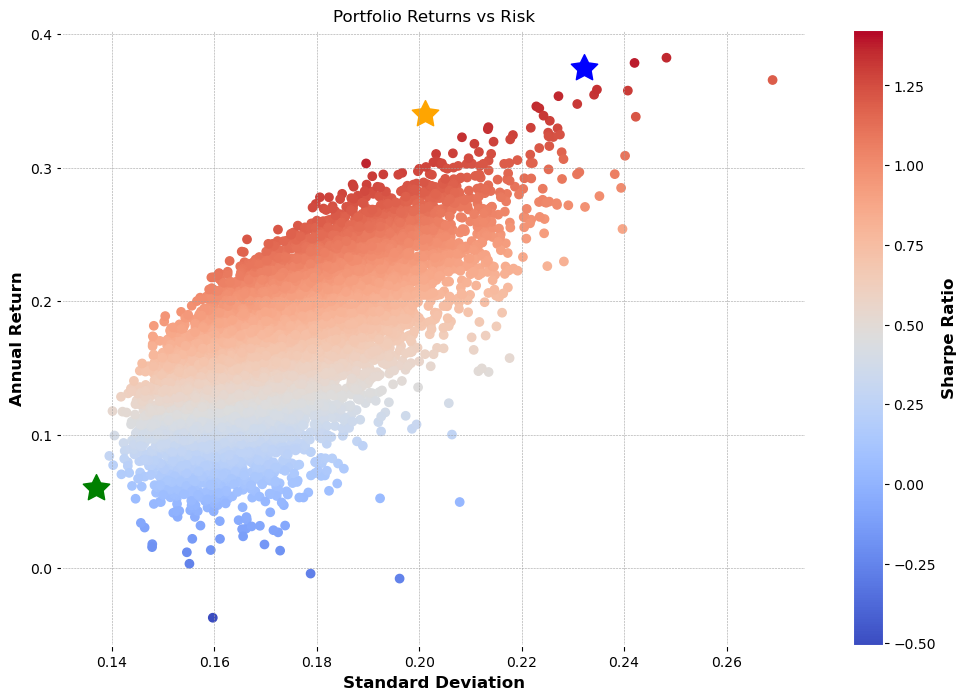

In [816]:
#Create Efficiciency Frontier Plot
plt.figure(figsize=(12,8))
plt.scatter(x= simulations_df['Volatility'], y = simulations_df['Returns'], c = simulations_df['Sharpe Ratio'], cmap = 'coolwarm')
plt.xlabel('Standard Deviation')
plt.ylabel('Annual Return')
plt.title('Portfolio Returns vs Risk')
plt.colorbar(label = 'Sharpe Ratio')

#Plot Maximum Sharpe using blue star 
plt.scatter(max_sharpe_x, max_sharpe_y, marker = (5, 1, 0), s = 400, color = 'blue')

#Plot minimum Volatility using green star
plt.scatter(min_vol_x, min_vol_y, marker = (5, 1, 0), s = 400, color = 'green')

#Plot the optimization result 
plt.scatter(optimized_metrics[1], optimized_metrics[0], marker = (5, 1, 0), s =400, color = 'orange')
plt.show()

Sector Analysis

Text(0.5, 1.0, 'Sector Allocation')

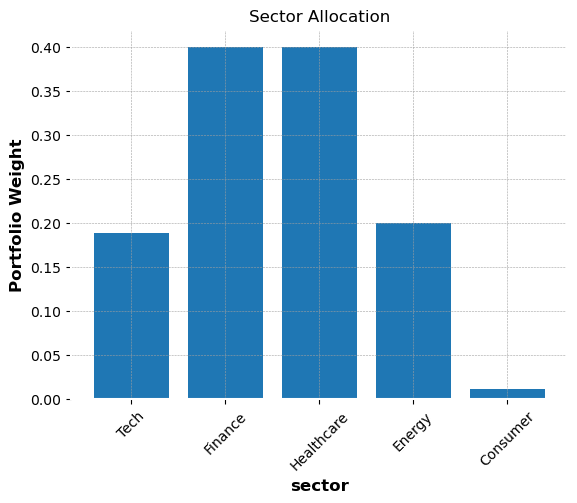

In [817]:
Tech = optimized_sharpe.x[:2].sum()
Finance = optimized_sharpe.x[2:4].sum()
Healthcare = optimized_sharpe.x[4:6].sum()
Energy = optimized_sharpe.x[6:8].sum()
Consumer = optimized_sharpe.x[8:10].sum()


sector_values =[Tech, Financial, Healthcare, Energy, Consumer]

sector_labels = ['Tech', 'Finance', 'Healthcare', 'Energy', 'Consumer']
plt.bar(sector_labels, sector_values)
plt.xticks(rotation = 45)
plt.xlabel('sector')
plt.ylabel("Portfolio Weight")
plt.title("Sector Allocation")